# Bao Afrik Survey Analysis

## Loading Excel File

In [1]:
import pandas as pd
import ast

# Load the file
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Define columns to convert from string to list
list_columns = ['products_missed', 'current_buy', 'selling_challenges', 'trust']

# Convert stringified lists to real lists
for col in list_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else ([x] if pd.notnull(x) else []))

# Clean items (trim + lowercase)
for col in list_columns:
    df[col] = df[col].apply(lambda items: [str(item).strip().lower() for item in items])

df[list_columns].head()


,products_missed,current_buy,selling_challenges,trust
0,"[food_ingredients, traditional_clothing, art_c...",[local_shops],[],[]
1,"[food_ingredients, prepared_foods, beauty_cosm...","[local_shops, friends_family]",[],[]
2,"[food_ingredients, prepared_foods, beauty_cosm...","[local_shops, friends_family]",[],[]
3,"[food_ingredients, traditional_clothing, music...","[friends_family, other]",[],[]
4,[prepared_foods],"[local_shops, friends_family]",[],[]


## Count of products missed

In [2]:
# Explode products_missed into rows
missed_products = df.explode('products_missed')

# Count frequencies
missed_counts = missed_products['products_missed'].value_counts()

# Display top 10 missed products
missed_counts.head(10)


products_missed
food_ingredients        18
traditional_clothing    16
traditional_medicine    11
prepared_foods           8
art_crafts               7
music_movies             5
beauty_cosmetic          4
other                    1
Name: count, dtype: int64

## Graph

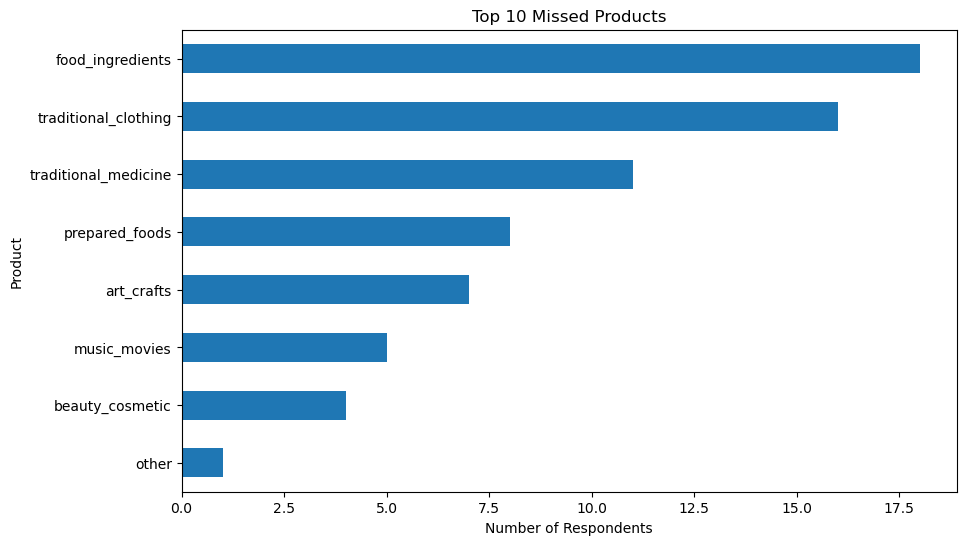

In [3]:
import matplotlib.pyplot as plt

missed_counts.head(10).plot(kind='barh', title='Top 10 Missed Products', figsize=(10, 6))
plt.xlabel("Number of Respondents")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.show()


## Count of current buy

In [4]:
# Explode and count
buy_sources = df.explode('current_buy')
buy_counts = buy_sources['current_buy'].value_counts()

buy_counts.head(10)


current_buy
local_shops       19
friends_family    13
other              2
cant_find          2
social_groups      2
online_stores      2
Name: count, dtype: int64

## Count of selling challenges

In [5]:
challenges = df.explode('selling_challenges')
challenge_counts = challenges['selling_challenges'].value_counts()

challenge_counts.head(10)


selling_challenges
finding_buyers    1
Name: count, dtype: int64

In [9]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Reapply list conversion for safety
import ast
list_columns = ['products_missed', 'current_buy', 'selling_challenges', 'trust']
for col in list_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else ([x] if pd.notnull(x) else []))

# Map monthly spend
spend_map = {
    'more_200': 'More than 200',
    '100_200': '100 – 200',
    '50_100': '50 – 100',
    '20_50': '20 – 50',
    'less_20': 'Less than 20'
}

# Map frequency
frequency_map = {
    'weekly': 'Weekly',
    'biweekly': 'Biweekly (2x/month)',
    'monthly': 'Monthly',
    'quarterly': 'Quarterly',
    'rarely': 'Rarely'
}

# Apply mappings
df['Monthly Spend (Readable)'] = df['monthly_spend'].map(spend_map)
df['Look Frequency (Readable)'] = df['look_frequency'].map(frequency_map)

# Create summary table
spend_tracking = df[['ID', 'Email', 'Monthly Spend (Readable)', 'Look Frequency (Readable)']]

# Display the result
display(spend_tracking)


,ID,Email,Monthly Spend (Readable),Look Frequency (Readable)
0,31,seudji@gmail.com,More than 200,Rarely
1,30,valentine622@yahoo.co.uk,100 – 200,Weekly
2,29,valentine622@yahoo.co.uk,100 – 200,Weekly
3,28,vendingstationery@yahoo.fr,50 – 100,Biweekly (2x/month)
4,27,louismbollo@myyahoo.com,50 – 100,Monthly
5,26,baoebong@gmail.com,100 – 200,Monthly
6,25,ikbangura40@gmail.com,More than 200,Quarterly
7,24,tabiwalters2000@yahoo.com,100 – 200,Weekly
8,23,vignus44@gmail.com,50 – 100,Biweekly (2x/month)
9,22,ornela200@yahoo.com,100 – 200,Monthly


## Track of Monthly Expense and Frequency of Look in GDP

In [10]:
# GBP-friendly spend map
spend_map_gbp = {
    'more_200': 'Over £200',
    '100_200': '£100 – £200',
    '50_100': '£50 – £100',
    '20_50': '£20 – £50',
    'less_20': 'Less than £20'
}

# Apply new readable GBP mapping
df['Monthly Spend (GBP)'] = df['monthly_spend'].map(spend_map_gbp)

# Display updated summary table
spend_tracking_gbp = df[['ID', 'Email', 'Monthly Spend (GBP)', 'Look Frequency (Readable)']]
display(spend_tracking_gbp)


,ID,Email,Monthly Spend (GBP),Look Frequency (Readable)
0,31,seudji@gmail.com,Over £200,Rarely
1,30,valentine622@yahoo.co.uk,£100 – £200,Weekly
2,29,valentine622@yahoo.co.uk,£100 – £200,Weekly
3,28,vendingstationery@yahoo.fr,£50 – £100,Biweekly (2x/month)
4,27,louismbollo@myyahoo.com,£50 – £100,Monthly
5,26,baoebong@gmail.com,£100 – £200,Monthly
6,25,ikbangura40@gmail.com,Over £200,Quarterly
7,24,tabiwalters2000@yahoo.com,£100 – £200,Weekly
8,23,vignus44@gmail.com,£50 – £100,Biweekly (2x/month)
9,22,ornela200@yahoo.com,£100 – £200,Monthly


## Monthly Spend Distribution

In [11]:
# Count how many people fall into each spend bracket
spend_summary = df['Monthly Spend (GBP)'].value_counts().sort_index()

# Display the result
print("Monthly Spend Distribution (GBP):")
print(spend_summary)


Monthly Spend Distribution (GBP):
Monthly Spend (GBP)
Less than £20    2
Over £200        5
£100 – £200      9
£20 – £50        2
£50 – £100       8
Name: count, dtype: int64


## Graph

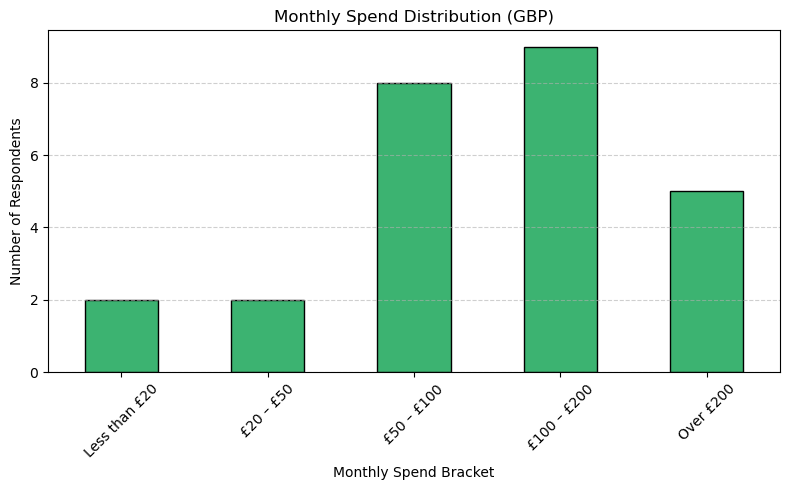

In [12]:
import matplotlib.pyplot as plt

# Sort for visual order (custom)
spend_order = ['Less than £20', '£20 – £50', '£50 – £100', '£100 – £200', 'Over £200']
spend_summary = df['Monthly Spend (GBP)'].value_counts().reindex(spend_order)

# Plot the bar chart
plt.figure(figsize=(8, 5))
spend_summary.plot(kind='bar', color='mediumseagreen', edgecolor='black')

# Labeling
plt.title("Monthly Spend Distribution (GBP)")
plt.xlabel("Monthly Spend Bracket")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Count of Responses given by Respondents

In [14]:
# Define the multiple-select columns
list_columns = ['products_missed', 'current_buy', 'selling_challenges', 'trust']

# Initialize a dictionary to store counts
response_counts = {}

# Explode each column and get value counts
for col in list_columns:
    exploded = df.explode(col)
    counts = exploded[col].value_counts().sort_values(ascending=False)
    response_counts[col] = counts

# Example: Display all counts
for col, counts in response_counts.items():
    print(f"\n Response Counts for: {col.replace('_', ' ').title()}")
    print(counts)



 Response Counts for: Products Missed
products_missed
food_ingredients        18
traditional_clothing    16
traditional_medicine    11
prepared_foods           8
art_crafts               7
music_movies             5
beauty_cosmetic          4
other                    1
Name: count, dtype: int64

 Response Counts for: Current Buy
current_buy
local_shops       19
friends_family    13
other              2
cant_find          2
social_groups      2
online_stores      2
Name: count, dtype: int64

 Response Counts for: Selling Challenges
selling_challenges
finding_buyers    1
Name: count, dtype: int64

 Response Counts for: Trust
trust
Originality of product    2
Name: count, dtype: int64


## Graphs

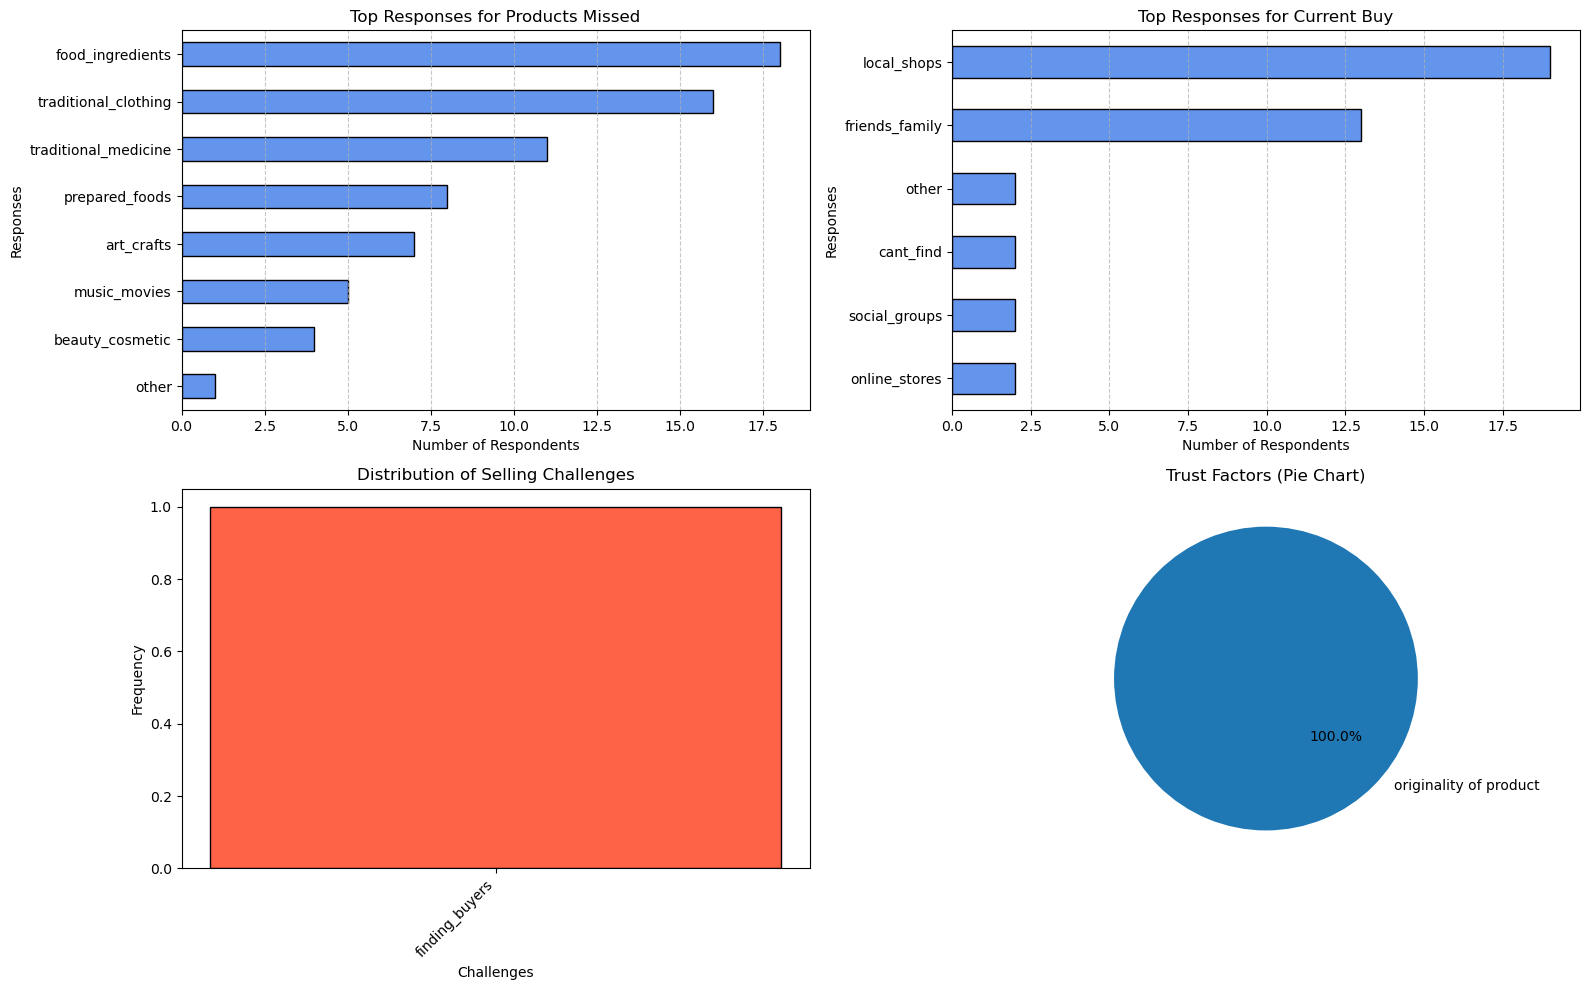

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# STEP 1: Load and clean data
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Columns with multiple selections
list_columns = ['products_missed', 'current_buy', 'selling_challenges', 'trust']

# Convert stringified lists to actual lists
for col in list_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else ([x] if pd.notnull(x) else []))

# Clean values: trim and lowercase
for col in list_columns:
    df[col] = df[col].apply(lambda items: [str(item).strip().lower() for item in items])

# STEP 2: Prepare charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

response_counts = {}

for i, col in enumerate(list_columns):
    # Explode list column
    exploded = df.explode(col)
    counts = exploded[col].value_counts().sort_values(ascending=False).head(10)
    response_counts[col] = counts
    ax = axes[i]

    if col == 'selling_challenges':
        # Histogram for challenges
        ax.hist(exploded[col].dropna(), bins=len(counts), color='tomato', edgecolor='black')
        ax.set_title("Distribution of Selling Challenges")
        ax.set_xlabel("Challenges")
        ax.set_ylabel("Frequency")
        ax.set_xticks(range(len(counts)))
        ax.set_xticklabels(counts.index, rotation=45, ha='right')

    elif col == 'trust':
        # Pie chart if 6 or fewer categories, else line chart
        counts = counts[counts > 0]
        if len(counts) <= 6:
            ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
            ax.set_title("Trust Factors (Pie Chart)")
        else:
            ax.plot(counts.index, counts.values, marker='o', linestyle='-', color='purple')
            ax.set_title("Trust Factors (Line Chart)")
            ax.set_ylabel("Frequency")
            ax.set_xticks(range(len(counts)))
            ax.set_xticklabels(counts.index, rotation=45, ha='right')

    else:
        # Bar chart for products_missed and current_buy
        counts.plot(kind='barh', ax=ax, color='cornflowerblue', edgecolor='black')
        ax.set_title(f"Top Responses for {col.replace('_', ' ').title()}")
        ax.set_xlabel("Number of Respondents")
        ax.set_ylabel("Responses")
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


## Product Search Frequency

Product Search Frequency:
Look Frequency (Readable)
Weekly                 7
Biweekly (2x/month)    5
Monthly                9
Quarterly              1
Rarely                 4
Name: count, dtype: int64


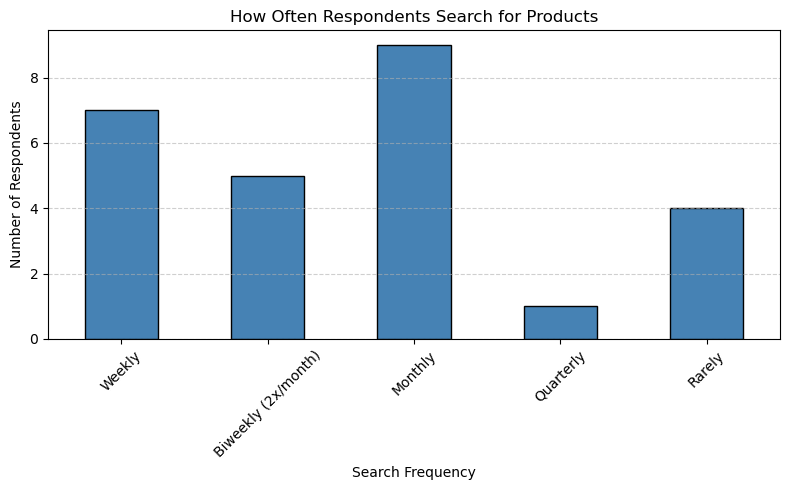

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Map frequency to readable labels (optional)
frequency_map = {
    'weekly': 'Weekly',
    'biweekly': 'Biweekly (2x/month)',
    'monthly': 'Monthly',
    'quarterly': 'Quarterly',
    'rarely': 'Rarely'
}

# Apply mapping
df['Look Frequency (Readable)'] = df['look_frequency'].map(frequency_map)

# Count frequency occurrences
freq_counts = df['Look Frequency (Readable)'].value_counts().reindex([
    'Weekly', 'Biweekly (2x/month)', 'Monthly', 'Quarterly', 'Rarely'
])

# Print summary
print("Product Search Frequency:")
print(freq_counts)

# Plot as bar chart
plt.figure(figsize=(8, 5))
freq_counts.plot(kind='bar', color='steelblue', edgecolor='black')

# Styling
plt.title("How Often Respondents Search for Products")
plt.xlabel("Search Frequency")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Product Search Frequency By Origin

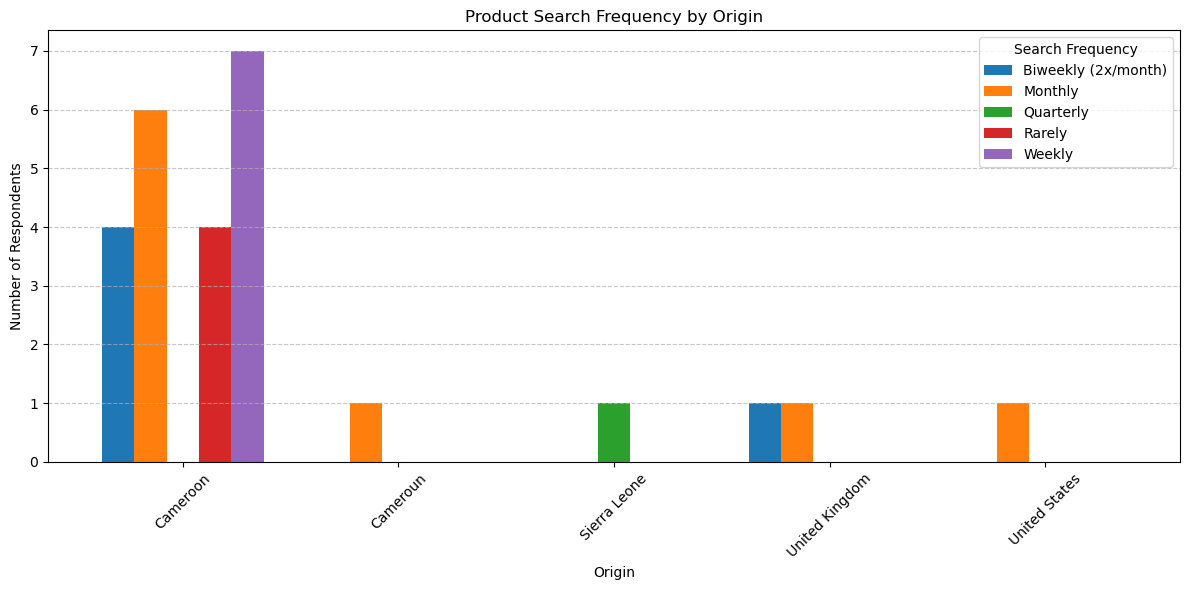

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel data
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Clean and format 'origin' column
df['origin'] = df['origin'].str.strip().str.title()

# Map look_frequency to readable format
df['Look Frequency (Readable)'] = df['look_frequency'].map({
    'weekly': 'Weekly',
    'biweekly': 'Biweekly (2x/month)',
    'monthly': 'Monthly',
    'quarterly': 'Quarterly',
    'rarely': 'Rarely'
})

# Group and count frequencies per origin
frequency_by_origin = df.groupby(['origin', 'Look Frequency (Readable)']).size().unstack(fill_value=0)

# Plot grouped bar chart
ax = frequency_by_origin.plot(kind='bar', figsize=(12, 6), width=0.75)

# Styling
plt.title("Product Search Frequency by Origin")
plt.xlabel("Origin")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Search Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Search Frequency by Monthly Spend & Top Missed Products by Search Frequency (Graphs)

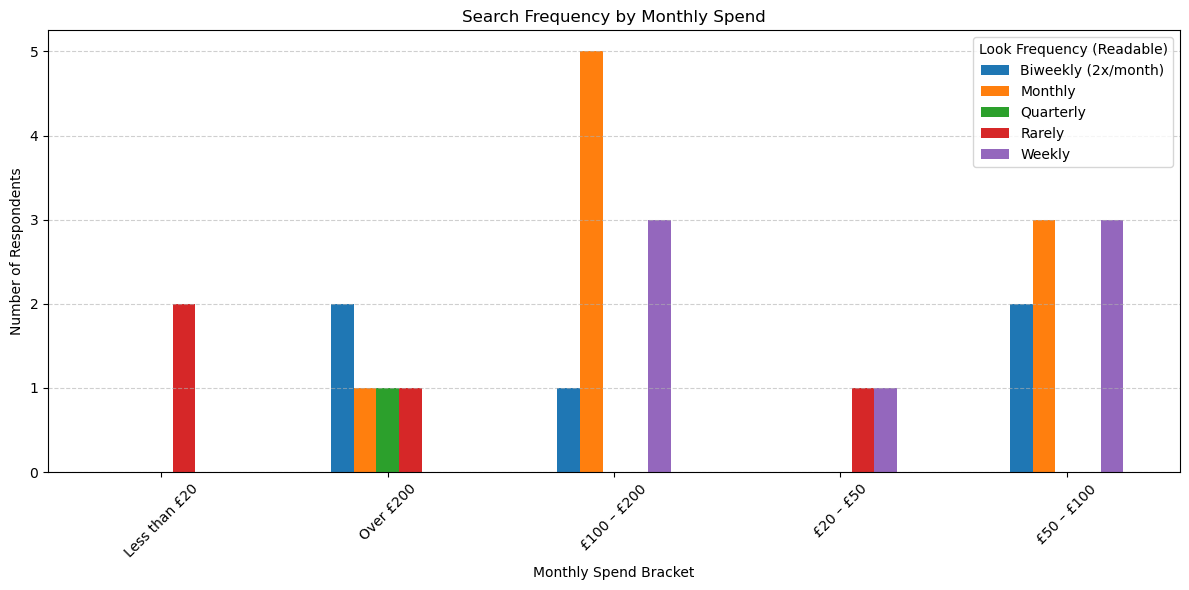

C:\Users\INTER-TECH\AppData\Local\Temp\ipykernel_7840\2633023216.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values('count', ascending=False).head(5))\


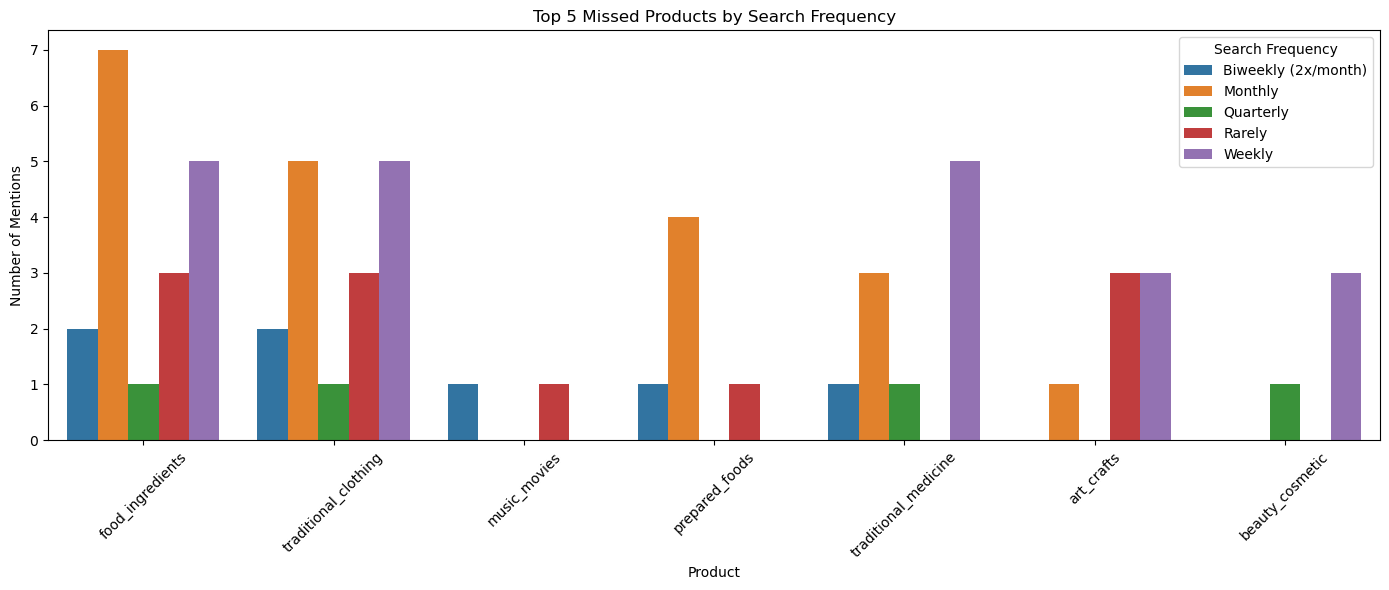

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the survey file
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Clean and format necessary fields
df['origin'] = df['origin'].str.strip().str.title()
df['Look Frequency (Readable)'] = df['look_frequency'].map({
    'weekly': 'Weekly',
    'biweekly': 'Biweekly (2x/month)',
    'monthly': 'Monthly',
    'quarterly': 'Quarterly',
    'rarely': 'Rarely'
})

df['Monthly Spend (GBP)'] = df['monthly_spend'].map({
    'more_200': 'Over £200',
    '100_200': '£100 – £200',
    '50_100': '£50 – £100',
    '20_50': '£20 – £50',
    'less_20': 'Less than £20'
})

# Convert products_missed to list
df['products_missed'] = df['products_missed'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else ([x] if pd.notnull(x) else [])
)
df['products_missed'] = df['products_missed'].apply(lambda items: [str(i).strip().lower() for i in items])

# ------------------------------------------
# 1. Spend vs Search Frequency (heatmap-style grouped bar)
# ------------------------------------------
pivot_spend_freq = df.groupby(['Monthly Spend (GBP)', 'Look Frequency (Readable)']).size().unstack(fill_value=0)
pivot_spend_freq.plot(kind='bar', figsize=(12, 6), title="Search Frequency by Monthly Spend")
plt.xlabel("Monthly Spend Bracket")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------------------------------
# 2. Most Missed Products by Search Frequency
# ------------------------------------------
# Explode products_missed
df_exploded = df.explode('products_missed')

# Group by Look Frequency and Count Top Missed Products
top_missed_by_freq = df_exploded.groupby(['Look Frequency (Readable)', 'products_missed']).size()
top_missed_by_freq = top_missed_by_freq.reset_index(name='count')

# Get top 5 missed products per frequency
top_missed_per_freq = top_missed_by_freq.groupby('Look Frequency (Readable)')\
    .apply(lambda x: x.sort_values('count', ascending=False).head(5))\
    .reset_index(drop=True)

# Plot top missed products per frequency
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(data=top_missed_per_freq, x='products_missed', y='count', hue='Look Frequency (Readable)')
plt.title("Top 5 Missed Products by Search Frequency")
plt.xlabel("Product")
plt.ylabel("Number of Mentions")
plt.legend(title="Search Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Count of Current Buying Method ( Graph)

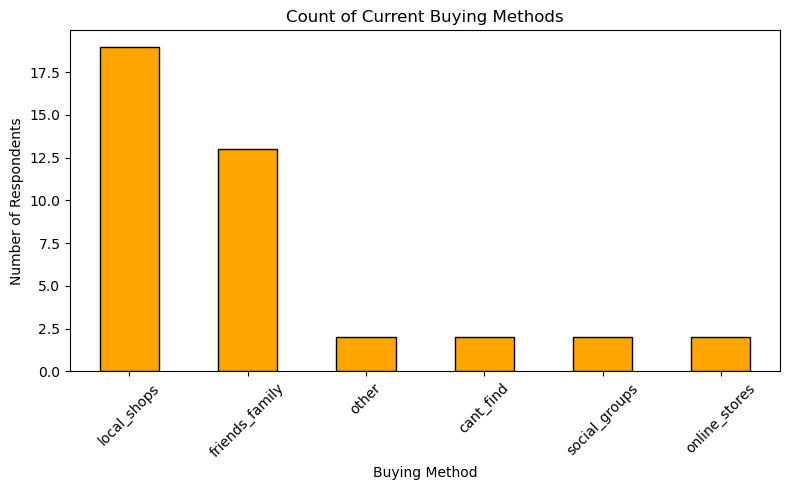

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load your survey data
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Function to clean and convert 'current_buy' field
def clean_current_buy(val):
    if isinstance(val, str) and val.startswith('['):
        try:
            return [str(i).strip().lower() for i in ast.literal_eval(val)]
        except:
            return []
    elif pd.notnull(val):
        return [str(val).strip().lower()]
    else:
        return []

# Apply cleaning
df['current_buy'] = df['current_buy'].apply(clean_current_buy)

# Explode and count
df_exploded_buy = df.explode('current_buy')
buy_counts = df_exploded_buy['current_buy'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
buy_counts.plot(kind='bar', ax=ax, color='orange', edgecolor='black')
ax.set_title("Count of Current Buying Methods")
ax.set_xlabel("Buying Method")
ax.set_ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Challenges faced in Finding products

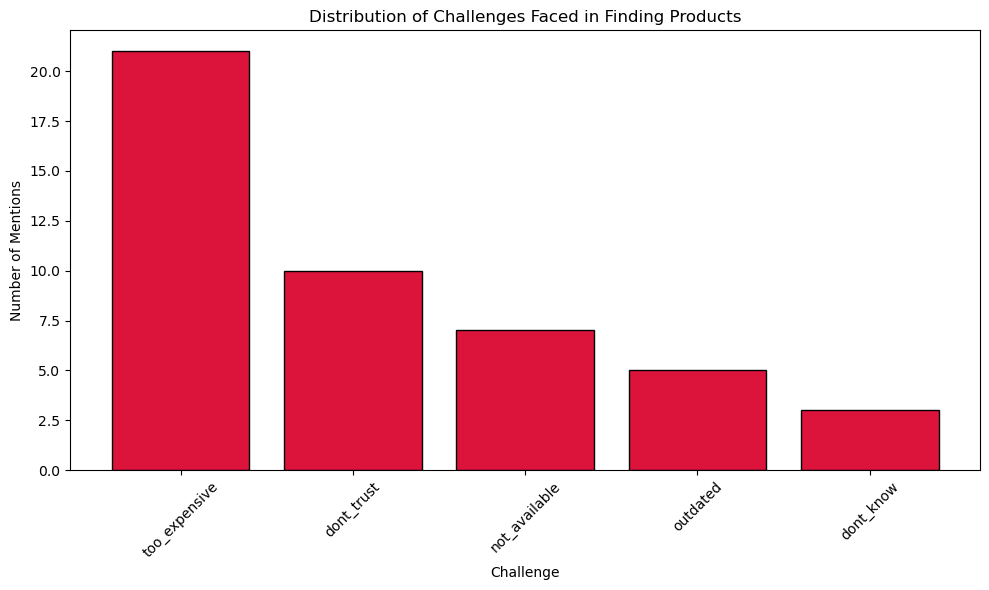

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load your dataset
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Clean and convert 'challenges_faced' column
def clean_challenges(val):
    if isinstance(val, str) and val.startswith('['):
        try:
            return [str(i).strip().lower() for i in ast.literal_eval(val)]
        except:
            return []
    elif pd.notnull(val):
        return [str(val).strip().lower()]
    else:
        return []

df['challenges_finding'] = df['challenges_finding'].apply(clean_challenges)

# Explode the list so each challenge is in its own row
df_challenges = df.explode('challenges_finding')

# Count occurrences of each challenge
challenge_counts = df_challenges['challenges_finding'].value_counts()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(challenge_counts.index, challenge_counts.values, color='crimson', edgecolor='black')
plt.title("Distribution of Challenges Faced in Finding Products")
plt.xlabel("Challenge")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Comfort Levels

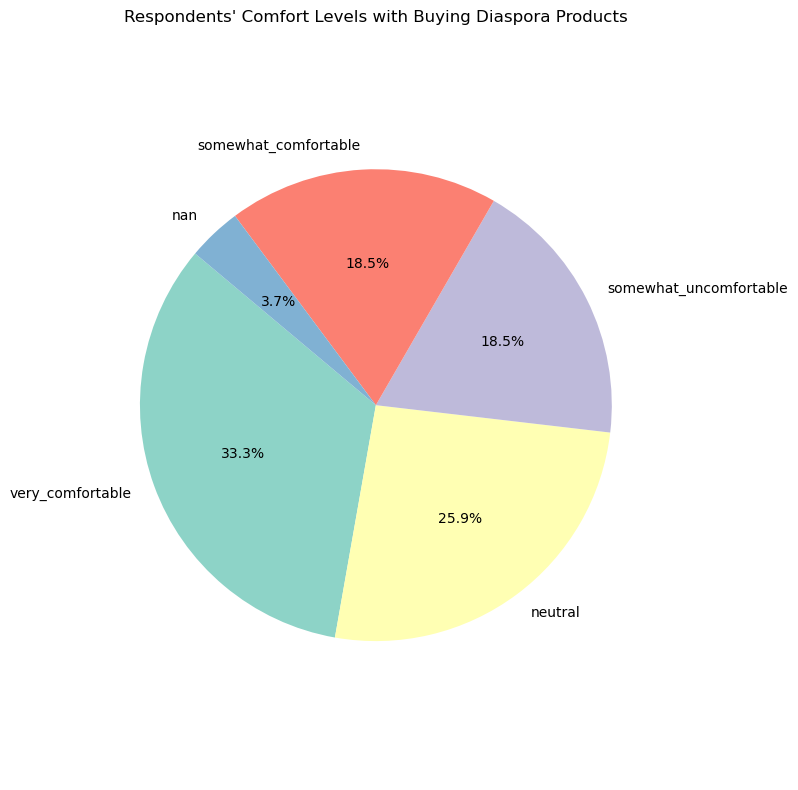

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your survey data
df = pd.read_excel("Bao Afrik Survey.xlsx", sheet_name="Sheet1")

# Clean and normalize the 'comfort_level' column
df['comfort_level'] = df['comfort_level'].astype(str).str.strip().str.lower()

# Count the occurrences of each comfort level
comfort_counts = df['comfort_level'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    comfort_counts.values,
    labels=comfort_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Respondents' Comfort Levels with Buying Diaspora Products")
plt.axis('equal')  # Ensures the pie is circular
plt.tight_layout()
plt.show()
